# Download

This section outlines the steps to download necessary datasets, tools, or external dependencies required for the project.

In [ ]:
import pandas as pd

isVariant = True

# Wget Mutations (Redundant Content)
#!wget -O UMD_mutations_EU.tsv.zip https://p53.fr/images/Database/UMD_mutations_EU.tsv.zip

# Wget Variants
!wget -O UMD_variants_EU.tsv.zip https://p53.fr/images/Database/UMD_variants_EU.tsv.zip

# Extract ZIP
!unzip UMD_variants_EU.tsv.zip -d ./UMD_dataset

# Verify Folder Content
!ls ./UMD_dataset

--2024-12-27 14:14:42--  https://p53.fr/images/Database/UMD_variants_EU.tsv.zip
Resolving p53.fr (p53.fr)... 213.186.33.17
Connecting to p53.fr (p53.fr)|213.186.33.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1355875 (1.3M) [application/zip]
Saving to: ‘UMD_variants_EU.tsv.zip’

UMD_variants_EU.tsv 100%[===================>]   1.29M  2.26MB/s    in 0.6s    

2024-12-27 14:14:43 (2.26 MB/s) - ‘UMD_variants_EU.tsv.zip’ saved [1355875/1355875]

Archive:  UMD_variants_EU.tsv.zip
  inflating: ./UMD_dataset/UMD_variants_EU.tsv  
  inflating: ./UMD_dataset/._UMD_variants_EU.tsv  
UMD_variants_EU.tsv


# Load Dataset

Explains how to import and load the dataset into a working environment, preparing it for analysis and preprocessing.

In [ ]:
# Load Dataset
file_path = './UMD_dataset/UMD_variants_EU.tsv'
data = pd.read_csv(file_path, sep='\t', encoding='latin-1')

# Show some row to check loading
print("Prime righe del dataset:")
print(data.head())

# Filter SNP mut only
snv_data = data[data['Variant_Type'] == 'SNP']
print(f"Mutazioni SNP trovate: {snv_data.shape[0]}")

print("\n Colonne: \n")
snv_data.columns


Prime righe del dataset:
  cDNA_variant    UMD_ID  COSMIC_ID       SNP_ID        HG19_Variant  \
0     c.524G>A  UMD_3113  COSM10648   rs28934578  chr17:g.7578406G>A   
1     c.743G>A  UMD_4903  COSM10662   rs11540652  chr17:g.7577538G>A   
2     c.818G>A  UMD_5583  COSM10660   rs28934576  chr17:g.7577120G>A   
3     c.817C>T  UMD_5576  COSM10659  rs121913343  chr17:g.7577121C>T   
4     c.742C>T  UMD_4895  COSM10656  rs121912651  chr17:g.7577539C>T   

         HG18_Variant        HG38_Variant     NG_017013.2_Variant  \
0  chr17:g.7519131G>A  chr17:g.7675088G>A  NG_017013.2:g.17463G>A   
1  chr17:g.7518263G>A  chr17:g.7674220G>A  NG_017013.2:g.18331G>A   
2  chr17:g.7517845G>A  chr17:g.7673802G>A  NG_017013.2:g.18749G>A   
3  chr17:g.7517846C>T  chr17:g.7673803C>T  NG_017013.2:g.18748C>T   
4  chr17:g.7518264C>T  chr17:g.7674221C>T  NG_017013.2:g.18330C>T   

  Transcript t1 MN_000546.5 Transcript t2 NM_001126112.2  ...  \
0                  c.524G>A                     c.524G>A  ... 

Index(['cDNA_variant', 'UMD_ID', 'COSMIC_ID', 'SNP_ID', 'HG19_Variant',
       'HG18_Variant', 'HG38_Variant', 'NG_017013.2_Variant',
       'Transcript t1 MN_000546.5', 'Transcript t2 NM_001126112.2',
       ...
       'Comment_1_Frequency', 'Comment_2_Activity', 'Comment_3_Isoforms',
       'Comment_4 prediction', 'Comment_5_Outliers', 'Comment_6_Splicing',
       'Comment_7_Sequence', 'Comment_10_population', 'Pathogenicity',
       'Final comment'],
      dtype='object', length=125)

# Debug

Focuses on identifying and resolving potential data issues or errors in the dataset.

  * Visualizza Colonne con NaN  
    Lists all columns that contain missing (NaN) values, helping to identify incomplete data.

  * Visualizza Righe con Colonna c avente valori null  
    Displays rows where the specific column "c" has null values to understand the scope of missing data.

  * Visualizza Tabella (Head)  
    Shows the first few rows of the dataset to provide a quick overview of its structure and content.

  * Stampa lista valori unici colonna e somma  
    Outputs a list of unique values in a particular column along with their frequency counts, providing insights into data distribution.

## Visualizza Colonne con NaN

In [ ]:
# Identify columns with at least one NaN value
columns_with_nan = snv_data_cleaned.columns[snv_data_cleaned.isnull().any()].tolist()

# Print the columns
print("\nColumns with at least one NaN value:")
print(columns_with_nan)
rows_with_nan = snv_data_cleaned[snv_data_cleaned[c].isnull()]
rows_with_nan.shape


Columns with at least one NaN value:
[]


(0, 65)

## Visualizza Righe con Colonna c avente valori null

In [ ]:
# Name of the column
c = 'WT AA_1_A'

# Filter rows where 'c' is NaN
rows_with_nan = snv_data_cleaned[snv_data_cleaned[c].isnull()]

# Display the filtered rows
print(f"\nRows where {c} is NaN:")
print(rows_with_nan)


Rows where WT AA_1_A is NaN:
Empty DataFrame
Columns: [Domain, Pathogenicity, cDNA_Position, WT_Codon_First_A, WT_Codon_First_T, WT_Codon_First_C, WT_Codon_First_G, WT_Codon_First_I, WT_Codon_Second_A, WT_Codon_Second_T, WT_Codon_Second_C, WT_Codon_Second_G, WT_Codon_Second_I, WT_Codon_Third_A, WT_Codon_Third_T, WT_Codon_Third_C, WT_Codon_Third_G, WT_Codon_Third_I, Mutant_Codon_First_A, Mutant_Codon_First_T, Mutant_Codon_First_C, Mutant_Codon_First_G, Mutant_Codon_First_I, Mutant_Codon_Second_A, Mutant_Codon_Second_T, Mutant_Codon_Second_C, Mutant_Codon_Second_G, Mutant_Codon_Second_I, Mutant_Codon_Third_A, Mutant_Codon_Third_T, Mutant_Codon_Third_C, Mutant_Codon_Third_G, Mutant_Codon_Third_I, cDNA_Ref_A, cDNA_Ref_T, cDNA_Ref_C, cDNA_Ref_G, cDNA_Mut_A, cDNA_Mut_T, cDNA_Mut_C, cDNA_Mut_G, WT AA_1_A, WT AA_1_T, WT AA_1_C, WT AA_1_G, Mutant AA_1_A, Mutant AA_1_T, Mutant AA_1_C, Mutant AA_1_G]
Index: []

[0 rows x 49 columns]


## Visualizza Tabella (Head)

In [ ]:
snv_data_cleaned.head()

,Domain,Pathogenicity,cDNA_Position,WT_Codon_First_A,WT_Codon_First_T,WT_Codon_First_C,WT_Codon_First_G,WT_Codon_First_I,WT_Codon_Second_A,WT_Codon_Second_T,...,cDNA_Mut_C,cDNA_Mut_G,WT AA_1_A,WT AA_1_T,WT AA_1_C,WT AA_1_G,Mutant AA_1_A,Mutant AA_1_T,Mutant AA_1_C,Mutant AA_1_G
0,HCD III - DNA binding,Pathogenic,524,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,HCD IV - DNA binding,Pathogenic,743,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,HCD V - DNA binding,Pathogenic,818,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,HCD V - DNA binding,Pathogenic,817,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,HCD IV - DNA binding,Pathogenic,742,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Stampa lista valori unici colonna e somma

In [ ]:
print_list = ['cDNA_variant', 'WT_Codon_First', 'WT_Codon']

for p in print_list:
  print(f"Valori unici in {p}:")
  print(snv_data_cleaned[p].unique())

  print(f"\nConteggio dei valori unici in '{p}':")
  print(snv_data_cleaned[p].value_counts())

  print(snv_data_cleaned[p].value_counts().sum())

Valori unici in cDNA_variant:
['c.524G>A' 'c.743G>A' 'c.818G>A' ... 'c.995T>C' 'c.996C>G' 'c.998G>C']

Conteggio dei valori unici in 'cDNA_variant':
cDNA_variant
c.524G>A    1
c.429G>C    1
c.360G>A    1
c.361T>C    1
c.364G>T    1
           ..
c.848G>T    1
c.867C>T    1
c.872A>G    1
c.873G>A    1
c.998G>C    1
Name: count, Length: 2592, dtype: int64
2592
Valori unici in WT_Codon_First:
['C' 'T' 'G' 'A' 'I']

Conteggio dei valori unici in 'WT_Codon_First':
WT_Codon_First
C    695
G    689
A    551
T    413
I    244
Name: count, dtype: int64
2592
Valori unici in WT_Codon:
['CGC' 'CGG' 'CGT' 'TAT' 'CGA' 'GGC' 'AGG' 'GTC' 'CAT' 'GAG' 'TAC' 'TGC'
 'TCC' 'ATC' 'ATG' 'GTG' 'CAG' 'CCT' 'GAA' 'TGT' 'AGA' 'CCG' 'CCC' 'CTT'
 'GGA' 'AAG' 'GCC' 'GTT' 'TGG' 'AAC' 'CAA' 'III' 'TCA' 'GAC' 'GGG' 'AGT'
 'ACC' 'GGT' 'CAC' 'ACG' 'CTC' 'TTT' 'ACT' 'CTG' 'GAT' 'TTC' 'AGC' 'ACA'
 'TTG' 'TCT' 'AAA' 'CCA' 'CTA' 'AAT' 'GCA' 'GCG' 'GCT' 'ATT' 'TTA' 'TCG'
 'TGA' 'TAA']

Conteggio dei valori unici in 'WT_Codon

# Data Cleaning


## Column and Rows Removal

**Operations Made:**  
- **Removing Irrelevant Columns:** Dropped columns that do not contribute to the predictive task, such as IDs or highly correlated features, to reduce dimensionality and computational complexity.  
- **Filtering Rows:** Removed rows with duplicate or irrelevant data, such as entries with all zero values or those outside a meaningful range.  

**Motivation:**  
This step ensures the dataset is streamlined and focused on relevant features, reducing noise and improving computational efficiency.

In [ ]:
# Columns to drop based on redundancy or irrelevance
columns_to_drop = [
    'UMD_ID', 'COSMIC_ID', 'SNP_ID',
    *[col for col in snv_data.columns if col.startswith('Transcript')],
    *[col for col in snv_data.columns if col.startswith('Protein')],
    # Columns to drop based on redundancy, irrelevance, or potential data leakage
    'HG19_Variant', 'HG18_Variant', 'HG38_Variant', 'NG_017013.2_Variant',  # Redundant genomic variant info
    'Start_cDNA', 'End_cDNA', 'Exon:intron_Start', 'Exon:intron_End',  # Derived info
    'Genome_base_coding', 'Mutant_Allele', 'Base_Change_Size', 'Ins_Size', 'Del_Size',  # Technical details
    'PTM', 'Variant_Comment',  # Specific but not useful
    *[col for col in snv_data.columns if col.startswith('Comment')],  # All comment-related columns
    'Sift_Prediction', 'Polyphen-2_HumVar', 'Provean_prediction', 'Condel',  # Computational predictions
    'Leukemia_Lymhoma_Freq', 'Solid_Tumor_Freq', 'Cell_line_Freq'  # Redundant frequency columns
]

# Drop unnecessary columns
snv_data_cleaned = snv_data.drop(columns=columns_to_drop, errors='ignore')

# Display remaining columns
print("\nRemaining columns after dropping unnecessary ones:")
print(snv_data_cleaned.columns)


NameError: name 'snv_data' is not defined

In [ ]:
# Additional columns to drop based on redundancy or irrelevance
additional_columns_to_drop = [
    'HG19_Start', 'HG19_End', 'HG18_Start', 'HG18_End',  # Genomic positions
    'WAF1_Act', 'MDM2_Act', 'BAX_Act', '_14_3_3_s_Act', 'AIP_Act', 'GADD45_Act', 'NOXA_Act', 'p53R2_Act',  # Residual activities
    'WAF1_percent', 'MDM2_percent', 'BAX_percent', '14_3_3_s_percent', 'AIP_percent', 'GADD45_percent', 'NOXA_percent', 'p53R2_percent',  # Percent activities
    'Sift_Score', 'Polyphen-2_HumDiv', 'Mutassessor_prediction', 'Mutassessor_score', 'Provean_Score', 'Condel_Score',  # Computational predictions
    'MutPred_Splice_General_Score', 'MutPred_Splice_Prediction_Label', 'MutPred_Splice_Confident_Hypotheses',  # Splice predictions
    'Final comment',  # Textual comment
    'Records_Number'
]

# Drop additional unnecessary columns
snv_data_cleaned = snv_data_cleaned.drop(columns=additional_columns_to_drop, errors='ignore')

# Display remaining columns after further cleaning
print("\nRemaining columns after additional cleaning:")
print(snv_data_cleaned.columns)



Remaining columns after additional cleaning:
Index(['cDNA_variant', 'Codon', 'WT_Codon', 'Mutant_Codon', 'WT AA_1',
       'WT AA_3', 'Mutant AA_1', 'Mutant AA_3', 'Substitution type', 'CpG',
       'Mutational_event', 'Tandem_Class', 'Variant_Classification',
       'Variant_Type', 'Mutation_Type', 'Domain', 'Structure', 'Tumor_Freq',
       'Somatic_Freq 2', 'Germline_Freq 2', 'Pathogenicity'],
      dtype='object')


Rimozione di Colonne poco informative o contenenti data leakage

In [ ]:
# Additional columns to drop based on redundancy or irrelevance
additional_columns_to_drop = [
    'CpG', 'Substitution type','Tumor_Freq','Somatic_Freq 2','Germline_Freq 2'
]

# Drop additional unnecessary columns
snv_data_cleaned = snv_data_cleaned.drop(columns=additional_columns_to_drop, errors='ignore')

# Display remaining columns after further cleaning
print("\nRemaining columns after additional cleaning:")
print(snv_data_cleaned.columns)


Remaining columns after additional cleaning:
Index(['cDNA_variant', 'Codon', 'WT_Codon', 'Mutant_Codon', 'WT AA_1',
       'WT AA_3', 'Mutant AA_1', 'Mutant AA_3', 'Mutational_event',
       'Tandem_Class', 'Variant_Classification', 'Variant_Type',
       'Mutation_Type', 'Domain', 'Structure', 'Pathogenicity'],
      dtype='object')


Valuta altri elementi vuoti e rimuovi righe con Patogenicità vuota

In [ ]:
# Drop rows with missing Pathogenicity
snv_data_cleaned = snv_data_cleaned.dropna(subset=['Pathogenicity'])

# Check for missing values
missing_values = snv_data_cleaned.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])


Missing values in each column:
Tandem_Class    2592
Domain           370
Structure       1427
dtype: int64


Rimozione Colonne con valori mancanti

In [ ]:
# Drop 'Tandem_Class' and 'Structure' columns
columns_to_drop = ['Tandem_Class', 'Structure']
snv_data_cleaned = snv_data_cleaned.drop(columns=columns_to_drop)

## Trattamento Dati

**Operations Made:**  
- **Handling Outliers:** Identified and either capped, removed, or replaced extreme values that could distort model training.  
- **Standardizing Formats:** Corrected inconsistent data formats (e.g., dates, categorical labels).  

**Motivation:**  
By addressing anomalies and inconsistencies, the data becomes more reliable and interpretable, which helps the model learn robust patterns.

Trattamento righe 'Codon' particolari

In [ ]:
# Clean 'Codon' column by removing everything after and including the dash ('-')
snv_data_cleaned['Codon'] = snv_data_cleaned['Codon'].str.replace(r'-.*', '', regex=True)

# Verify the result
print("\nCleaned 'Codon' column:")
print(snv_data_cleaned['Codon'].unique())  # Print unique values to verify changes

##-------------------------------#
# Replace values in 'Codon' containing 'ter' or 'Ter' with 0
snv_data_cleaned.loc[snv_data_cleaned['Codon'].str.contains(r'ter', case=False, na=False), 'Codon'] = 0

# Verify the result
print("\nUpdated 'Codon' column (ter replaced with 0):")
print(snv_data_cleaned['Codon'].unique())


##------------------------------#
# Replace non-numeric values in 'Codon' with -1
snv_data_cleaned['Codon'] = snv_data_cleaned['Codon'].apply(lambda x: -1 if not str(x).isdigit() else int(x))

# Verify the result
print("\nUpdated 'Codon' column (non-numeric replaced with -1):")
print(snv_data_cleaned['Codon'].unique())

NameError: name 'snv_data_cleaned' is not defined

Trattamento WT_Codon e Mutant_Codon righe particolari

In [ ]:
# Standardize WT_Codon and Mutant_Codon by replacing non-standard strings with 'III'
columns_to_update = ['WT_Codon', 'Mutant_Codon']

for col in columns_to_update:
    snv_data_cleaned[col] = snv_data_cleaned[col].apply(
        lambda x: 'III' if not isinstance(x, str) or not x.isalpha() or len(x) != 3 else x.upper()
    )

# Verify the result
print("\nUpdated columns (non-standard replaced with 'III'):")
for col in columns_to_update:
    print(f"\nUnique values in {col}:")
    print(snv_data_cleaned[col].unique())


Updated columns (non-standard replaced with 'III'):

Unique values in WT_Codon:
['CGC' 'CGG' 'CGT' 'TAT' 'CGA' 'GGC' 'AGG' 'GTC' 'CAT' 'GAG' 'TAC' 'TGC'
 'TCC' 'ATC' 'ATG' 'GTG' 'CAG' 'CCT' 'GAA' 'TGT' 'AGA' 'CCG' 'CCC' 'CTT'
 'GGA' 'AAG' 'GCC' 'GTT' 'TGG' 'AAC' 'CAA' 'III' 'TCA' 'GAC' 'GGG' 'AGT'
 'ACC' 'GGT' 'CAC' 'ACG' 'CTC' 'TTT' 'ACT' 'CTG' 'GAT' 'TTC' 'AGC' 'ACA'
 'TTG' 'TCT' 'AAA' 'CCA' 'CTA' 'AAT' 'GCA' 'GCG' 'GCT' 'ATT' 'TTA' 'TCG'
 'TGA' 'TAA']

Unique values in Mutant_Codon:
['CAC' 'CAG' 'CAT' 'TGT' 'TGG' 'TGA' 'AGC' 'AGT' 'TTC' 'CGT' 'AAG' 'TGC'
 'GAC' 'CTT' 'ACC' 'ATA' 'TAT' 'CTC' 'ATG' 'TAG' 'TCT' 'AAA' 'CTG' 'TAC'
 'ACA' 'GTC' 'TCC' 'GAA' 'AGG' 'TTG' 'AGA' 'CAA' 'TTT' 'GTG' 'GTA' 'AAC'
 'CCC' 'GGA' 'CTA' 'GGG' 'TAA' 'ATT' 'III' 'GAG' 'CCT' 'GGC' 'AAT' 'ACT'
 'GCT' 'GTT' 'CCG' 'CGC' 'ACG' 'GGT' 'GAT' 'CCA' 'GCC' 'ATC' 'TCG' 'GCG'
 'CGA' 'CGG' 'TTA' 'GCA' 'TCA']


## Data Imputation

**Operations Made:**  
- **Domain Imputation**: Some data have null domain: impute domain by proximity
- **Motivation**: Domain data is important and give useful info for malignancy prediction, it is worth impute data. Proximity and Intron evaluation is a valid method

Fill empty Domain values

In [ ]:
# Step 1: Split dataset into rows with and without 'Domain'
domain_missing = snv_data_cleaned[snv_data_cleaned['Domain'].isnull()]
domain_known = snv_data_cleaned[~snv_data_cleaned['Domain'].isnull()]

# Function to find the closest domain or return 'Intron' for missing codons
def find_closest_or_default_domain(codon, known_data):
    try:
        # Convert Codon to integer for numeric comparison
        codon = int(codon)
        # Calculate distances to known codons and find the closest
        known_data = known_data.copy()  # Avoid SettingWithCopyWarning
        known_data['Codon_Distance'] = abs(known_data['Codon'].astype(int) - codon)
        closest_row = known_data.loc[known_data['Codon_Distance'].idxmin()]
        return closest_row['Domain']
    except (ValueError, TypeError):
        # If codon is not a valid number, assume it's an intron
        return 'Intron'

# Apply the function to impute missing 'Domain' values
imputed_domains = []
for index, row in domain_missing.iterrows():
    closest_domain = find_closest_or_default_domain(row['Codon'], domain_known)
    imputed_domains.append(closest_domain)

# Assign the imputed domains back to the missing rows
snv_data_cleaned.loc[domain_missing.index, 'Domain'] = imputed_domains

# Verify the result
print("\nUpdated 'Domain' distribution:")
print(snv_data_cleaned['Domain'].value_counts())

NameError: name 'snv_data_cleaned' is not defined

## Derivazione delle Feature

**Operations Made:**  
* Separated WT and Mutant Codon in 3 different column each (1 for each nucleotide)
* From mutation code: extracted position, WT nucleotide, Mutated nucleotide


**Motivation:**  
* Codon info gives inception to position of mutation inside the codon and the WT and Mutant AA
* Position gives reference for protein Domain but also mRNA and DNA position could be relevant


Divisione Codone WildType e Mutato in Nucleotide1 - Nucleotide2 - Nucleotide3

---



In [ ]:
# Separate WT_Codon into its three nucleotides
snv_data_cleaned['WT_Codon_First'] = snv_data_cleaned['WT_Codon'].str[0]
snv_data_cleaned['WT_Codon_Second'] = snv_data_cleaned['WT_Codon'].str[1]
snv_data_cleaned['WT_Codon_Third'] = snv_data_cleaned['WT_Codon'].str[2]

# Separate Mutant_Codon into its three nucleotides
snv_data_cleaned['Mutant_Codon_First'] = snv_data_cleaned['Mutant_Codon'].str[0]
snv_data_cleaned['Mutant_Codon_Second'] = snv_data_cleaned['Mutant_Codon'].str[1]
snv_data_cleaned['Mutant_Codon_Third'] = snv_data_cleaned['Mutant_Codon'].str[2]

NameError: name 'snv_data_cleaned' is not defined

Estrazione da cDNA_variant e gestione valori particolari

In [ ]:
import numpy as np
import re  # Import regular expressions
# Function to calculate absolute position from cDNA_variant
def calculate_position(variant):
    try:
        # Remove nucleotide change (e.g., G>A, T>C)
        variant_cleaned = re.sub(r'[A-Z]>[A-Z]', '', variant)
        variant_cleaned = re.sub(r'c.', '', variant_cleaned)

        # Handle 3' UTR positions like "c.*5325"
        if variant_cleaned.startswith('*'):
            return int(variant_cleaned[1:])

        # Handle downstream intronic positions like "c.-29+1002" or "c.30+200"
        if '+' in variant_cleaned:
            parts = variant_cleaned.split('+')
            if len(parts) == 2:
                base, offset = parts
                return int(base) + int(offset)

        # Handle upstream intronic positions like "c.-28-1001"
        if '-' in variant_cleaned:
            parts = variant_cleaned.split('-')
            if len(parts) == 2:
                base, offset = parts
                if base == '':
                  base = '0'
                return int(base) - int(offset)
            if len(parts) == 3:
                empty, base, offset = parts
                return - int(base) - int(offset)

        # Handle simple numeric positions like "c.742"
        if re.match(r'\d+$', variant_cleaned):
            return int(re.search(r'(\d+)', variant_cleaned).group(1))

        # Return NaN for unhandled cases
        print(f"No error but -1: {variant}")
        return -1
    except Exception as e:
        print(f"Error processing variant {variant}: {e}")
        return np.nan

# Apply the function to cDNA_variant
snv_data_cleaned['cDNA_Position'] = snv_data_cleaned['cDNA_variant'].apply(calculate_position)

# Verify the results
print("\nUpdated cDNA_Position values:")
print(snv_data_cleaned[['cDNA_variant', 'cDNA_Position']].head(20))


Updated cDNA_Position values:
   cDNA_variant  cDNA_Position
0      c.524G>A            524
1      c.743G>A            743
2      c.818G>A            818
3      c.817C>T            817
4      c.742C>T            742
5      c.844C>T            844
6      c.659A>G            659
7      c.637C>T            637
8      c.733G>A            733
9      c.747G>T            747
10     c.586C>T            586
11    c.1024C>T           1024
12     c.916C>T            916
13     c.469G>T            469
14     c.536A>G            536
15     c.853G>A            853
16     c.488A>G            488
17     c.734G>A            734
18     c.527G>T            527
19     c.818G>T            818


Estrazione cDNA_variant colonne Ref e Mut

In [ ]:
import numpy as np

# Extract wild-type and mutant nucleotides
snv_data_cleaned['cDNA_Ref'] = snv_data_cleaned['cDNA_variant'].str.extract(r'c\.[\d*+-]+([A-Z])>', expand=False)
snv_data_cleaned['cDNA_Mut'] = snv_data_cleaned['cDNA_variant'].str.extract(r'c\.[\d*+-]+[A-Z]>([A-Z])', expand=False)

# Verify results
print("\nExamples of extracted values from 'cDNA_variant':")
print(snv_data_cleaned[['cDNA_variant', 'cDNA_Position', 'cDNA_Ref', 'cDNA_Mut']].head())


# Remove cDNA_variant column
snv_data_cleaned = snv_data_cleaned.drop(columns=['cDNA_variant'])


Examples of extracted values from 'cDNA_variant':
  cDNA_variant  cDNA_Position cDNA_Ref cDNA_Mut
0     c.524G>A            524        G        A
1     c.743G>A            743        G        A
2     c.818G>A            818        G        A
3     c.817C>T            817        C        T
4     c.742C>T            742        C        T


## Encoding

**Operations Made:**  
- The code inspects unique values and their counts for specific columns (`'cDNA_Ref'`, `'cDNA_Mut'`, `'WT AA_1'`, and `'WT_Codon_First'`), which are likely categorical features.  
- It prints both the unique values and the frequency distribution of these columns to assess their data quality and potential relevance.
- `OneHotEncoding` used for aminoacids and nucleotides based columns using all possible values for enconding to ensure uniform inputs
. `Get Dummies` for Domain column

**Motivation:**  
Understanding the distribution of categorical features is crucial for selecting the appropriate encoding method, such as one-hot encoding or label encoding. This step helps ensure the data is properly represented for machine learning models by encoding it.

In [ ]:
print_list = ['cDNA_Ref', 'cDNA_Mut', 'WT AA_1', 'WT_Codon_First']
print_list2 = ['cDNA_Position', 'WT AA_1']

for p in print_list:
  print(f"Valori unici in {p}:")
  print(snv_data_cleaned[p].unique())

  print(f"\nConteggio dei valori unici in '{p}':")
  print(snv_data_cleaned[p].value_counts())

  print(snv_data_cleaned[p].value_counts().sum())

Valori unici in cDNA_Ref:


NameError: name 'snv_data_cleaned' is not defined

Encoding di WT_Codon_X e Mutant_Codon_X

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

# Define valid categories
nucleotide_categories = ['A', 'T', 'C', 'G', 'I'] # 'I' is for Intronic Sequences modified to output III in some rows

# Columns to Encoda
columns_to_encode = ['WT_Codon_First', 'WT_Codon_Second', 'WT_Codon_Third',
                     'Mutant_Codon_First', 'Mutant_Codon_Second', 'Mutant_Codon_Third']

# Specify valid categories for each column - One Hot Encoding
encoder = OneHotEncoder(categories=[nucleotide_categories] * len(columns_to_encode),
                        sparse_output=False,  # Sparse representation if True
                        handle_unknown='ignore')  # Ignore unknown values

# Fit-transform of selected Columns
encoded_matrix = encoder.fit_transform(snv_data_cleaned[columns_to_encode])

# Verify Matrix Shape
print("\nShape of one-hot encoded matrix:")
print(encoded_matrix.shape)

# Replace original columns with matrix
snv_data_cleaned_2 = snv_data_cleaned.drop(columns=columns_to_encode)
#snv_data_cleaned_sparse = pd.concat([snv_data_cleaned_sparse, pd.DataFrame.sparse.from_spmatrix(encoded_sparse_matrix)], axis=1) # If sparse_output=True

# Convert matrix to DataFrame
encoded_dense_matrix = pd.DataFrame(
    encoded_matrix,  # Matrix (numpy.ndarray)
    index=snv_data_cleaned.index,
    columns=encoder.get_feature_names_out(columns_to_encode)
)
# Drop original columns and concatenate encoded columns
snv_data_cleaned_2 = snv_data_cleaned.drop(columns=columns_to_encode)
snv_data_cleaned_2 = pd.concat([snv_data_cleaned_2, encoded_dense_matrix], axis=1)

print("\nDataset after encoding:")
print(snv_data_cleaned_2.head())


# Drop unnecessary columns
columns_to_drop = [
    'Codon', 'WT_Codon', 'Mutant_Codon', 'WT AA_3',
    'Mutant AA_3', 'Mutational_event', 'Variant_Classification',
    'Variant_Type', 'Mutation_Type'
]
snv_data_cleaned = snv_data_cleaned_2.drop(columns=columns_to_drop)

NameError: name 'snv_data_cleaned' is not defined

Encoding di cDNA_Ref e _Mut

In [ ]:
nucleotide_categories = ['A', 'T', 'C', 'G']
# Columns to encode
columns_to_encode = ['cDNA_Ref', 'cDNA_Mut']

# Apply one-hot encoding to cDNA_Ref and cDNA_Mut
encoder = OneHotEncoder(categories=[nucleotide_categories] * len(columns_to_encode),
                        sparse_output=False,
                        handle_unknown='ignore')

# Fit-transform of selected columns
encoded_matrix = encoder.fit_transform(snv_data_cleaned[columns_to_encode])

# Verify Matrix shape
print("\nShape of one-hot encoded matrix:")
print(encoded_matrix.shape)

# Replace original columns with matrix
snv_data_cleaned_2 = snv_data_cleaned.drop(columns=columns_to_encode)

# Convert matrix to DataFrame
pd_encoded_matrix = pd.DataFrame(
    encoded_matrix,
    index=snv_data_cleaned.index,
    columns=encoder.get_feature_names_out(columns_to_encode)
)

snv_data_cleaned_2 = pd.concat([snv_data_cleaned_2, pd_encoded_matrix], axis=1)

print("\nDataset after encoding:")
print(snv_data_cleaned_2.head())

snv_data_cleaned = snv_data_cleaned_2

NameError: name 'OneHotEncoder' is not defined

Encoding degli Aminoacidi

In [ ]:
aa_categories = ['G','A','V','L','I','T','S','M','C','P','F','Y','W','H','K','R','D','E','N','Q','0']

# Combine columns to encode
columns_to_encode = ['WT AA_1','Mutant AA_1']

import re

def clean_amino_acids_introns(variant):
  if variant == '*':
     return '0'
  if re.match(r'^\w$', variant):
    return variant
  else:
    return '0'

for v in columns_to_encode:
  snv_data_cleaned[v] = snv_data_cleaned[v].apply(clean_amino_acids_introns)

# Apply one-hot encoding
encoder = OneHotEncoder(categories=[aa_categories] * len(columns_to_encode),
                        sparse_output=False,
                        handle_unknown='ignore')

# Fit-transform
encoded_matrix = encoder.fit_transform(snv_data_cleaned[columns_to_encode])

# Verify matrix shape
print("\nShape of one-hot encoded matrix:")
print(encoded_matrix.shape)

# Replace original column in matrix
snv_data_cleaned_2 = snv_data_cleaned.drop(columns=columns_to_encode)

# Convert matrix to DataFrame
pd_encoded_matrix = pd.DataFrame(
    encoded_matrix,
    index=snv_data_cleaned.index,
    columns=encoder.get_feature_names_out(columns_to_encode)
)

snv_data_cleaned_2 = pd.concat([snv_data_cleaned_2, pd_encoded_matrix], axis=1)

print("\nDataset after encoding:")
print(snv_data_cleaned_2.head())

snv_data_cleaned = snv_data_cleaned_2

NameError: name 'snv_data_cleaned' is not defined

Valuta tipi di colonne e trova i non numerici

In [ ]:
# Check the data types of the features
print("\nFeature types in Dataset:")
print(snv_data_cleaned.dtypes)

# Identify non-numeric columns
non_numeric_columns = snv_data_cleaned.select_dtypes(include=['object']).columns
print("\nNon-numeric columns in Dataset:")
print(non_numeric_columns)


Feature types in Dataset:
Domain                    object
Pathogenicity             object
cDNA_Position              int64
WT_Codon_First_A         float64
WT_Codon_First_T         float64
WT_Codon_First_C         float64
WT_Codon_First_G         float64
WT_Codon_First_I         float64
WT_Codon_Second_A        float64
WT_Codon_Second_T        float64
WT_Codon_Second_C        float64
WT_Codon_Second_G        float64
WT_Codon_Second_I        float64
WT_Codon_Third_A         float64
WT_Codon_Third_T         float64
WT_Codon_Third_C         float64
WT_Codon_Third_G         float64
WT_Codon_Third_I         float64
Mutant_Codon_First_A     float64
Mutant_Codon_First_T     float64
Mutant_Codon_First_C     float64
Mutant_Codon_First_G     float64
Mutant_Codon_First_I     float64
Mutant_Codon_Second_A    float64
Mutant_Codon_Second_T    float64
Mutant_Codon_Second_C    float64
Mutant_Codon_Second_G    float64
Mutant_Codon_Second_I    float64
Mutant_Codon_Third_A     float64
Mutant_Codon_Thi

Encoding di 'Domain'

In [ ]:
# Encoding for remaining categorical columns
categorical_columns = ['Domain']
snv_data_cleaned = pd.get_dummies(snv_data_cleaned, columns=categorical_columns)

# Verify the dataset after cleaning and encoding
print("\nDataset X after cleaning and encoding:")
print(snv_data_cleaned.head())


NameError: name 'snv_data_cleaned' is not defined

# Feature Scaling

**Operations Made:**

  * Used MinMaxScaler from sklearn.preprocessing to normalize the numerical column 'cDNA_Position'.
  * Transformed the values of this column to a range between 0 and 1.
  * Verified the scaled data by printing the first few rows of the normalized dataset.

**Motivation:**
* Normalization ensures that all features have a consistent scale, preventing features with larger ranges from dominating the learning process.
* This step improves the stability and convergence speed of machine learning models.

## Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# List of numerical columns to normalize
numerical_columns = ['cDNA_Position']

# Apply MinMaxScaler
scaler = MinMaxScaler()
snv_data_cleaned[numerical_columns] = scaler.fit_transform(snv_data_cleaned[numerical_columns])

# Verify the normalized dataset
print("\nDataset after normalizing numerical columns:")
print(snv_data_cleaned[numerical_columns].head())


NameError: name 'snv_data_cleaned' is not defined

In [ ]:
snv_data_cleaned.head()

,Pathogenicity,cDNA_Position,WT_Codon_First_A,WT_Codon_First_T,WT_Codon_First_C,WT_Codon_First_G,WT_Codon_First_I,WT_Codon_Second_A,WT_Codon_Second_T,WT_Codon_Second_C,...,Domain_NES - Transactivation TAD1,Domain_NES - Transactivation TAD2,Domain_NLS,Domain_NLS - Negative regulation,Domain_Negative regulation,Domain_Oligomerization,Domain_Proline Rich,Domain_Transactivation TAD1,Domain_Transactivation TAD2,Domain_Transactivation TAD2 - Proline Rich
0,Pathogenic,0.376890,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,Pathogenic,0.392511,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,Pathogenic,0.397860,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,Pathogenic,0.397789,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,Pathogenic,0.392439,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


Encoding Pathogenicity

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Map all unique values in 'Pathogenicity' to numeric classes
snv_data_cleaned['Pathogenicity'] = snv_data_cleaned['Pathogenicity'].map({
    'Benign': 0,
    'Pathogenic': 1,
    'Likely Pathogenic': 1,
    'VUS': 2,
    'Possibly pathogenic': 2,
    'Possibly Pathogenic': 2  # Adjust capitalization if needed
})

# Check for NaN values after mapping
if snv_data_cleaned['Pathogenicity'].isnull().any():
    print("\nRows with NaN in 'Pathogenicity':")
    print(snv_data_cleaned[snv_data_cleaned['Pathogenicity'].isnull()])
    # Drop rows with NaN in 'Pathogenicity' (or handle as appropriate)
    snv_data_cleaned = snv_data_cleaned.dropna(subset=['Pathogenicity'])

# Verify class distribution after cleaning
print("\nUpdated class distribution in 'Pathogenicity':")
print(snv_data_cleaned['Pathogenicity'].value_counts())


Updated class distribution in 'Pathogenicity':
Pathogenicity
2    1594
0     598
1     400
Name: count, dtype: int64


Rimozione Campi Codificati in altre colonne

In [ ]:
# List of split codon columns to drop
columns_to_drop = [
    'WT_Codon_First', 'WT_Codon_Second', 'WT_Codon_Third',
    'Mutant_Codon_First', 'Mutant_Codon_Second', 'Mutant_Codon_Third'
]

# Drop the columns
snv_data_cleaned = snv_data_cleaned.drop(columns=columns_to_drop, errors='ignore')

# Verify remaining columns
print("\nDataset after dropping split codon columns:")
print(snv_data_cleaned.dtypes)



Dataset after dropping split codon columns:
Pathogenicity                                   int64
cDNA_Position                                 float64
WT_Codon_First_A                              float64
WT_Codon_First_T                              float64
WT_Codon_First_C                              float64
                                               ...   
Domain_Oligomerization                           bool
Domain_Proline Rich                              bool
Domain_Transactivation TAD1                      bool
Domain_Transactivation TAD2                      bool
Domain_Transactivation TAD2 - Proline Rich       bool
Length: 65, dtype: object


In [ ]:
# Check if splitting leaves data with NaN values
X = snv_data_cleaned.drop(columns=['Pathogenicity'])
y = snv_data_cleaned['Pathogenicity']


# Check for NaN values in the entire dataset
print("\nColumns with NaN values in X:")
print(X.isnull().sum()[X.isnull().sum() > 0])

# Find rows with NaN values
print("\nRows with NaN values in X:")
print(X[X.isnull().any(axis=1)])

# Count total rows with NaN
total_nan_rows = X.isnull().any(axis=1).sum()
print(f"\nTotal rows with NaN values in X: {total_nan_rows}")


NameError: name 'snv_data_cleaned' is not defined

In [ ]:
print(X.head(10))

   cDNA_Position  WT_Codon_First_A  WT_Codon_First_T  WT_Codon_First_C  \
0       0.376890               0.0               0.0               1.0   
1       0.392511               0.0               0.0               1.0   
2       0.397860               0.0               0.0               1.0   
3       0.397789               0.0               0.0               1.0   
4       0.392439               0.0               0.0               1.0   
5       0.399715               0.0               0.0               1.0   
6       0.386519               0.0               1.0               0.0   
7       0.384950               0.0               0.0               1.0   
8       0.391797               0.0               0.0               0.0   
9       0.392796               1.0               0.0               0.0   

   WT_Codon_First_G  WT_Codon_First_I  WT_Codon_Second_A  WT_Codon_Second_T  \
0               0.0               0.0                0.0                0.0   
1               0.0        

# Data Balancing

**Operations Made:**
  * Balance data: pathogenic > incert > benign: unbalanced data could deteriorate ML performance. Used `SMOTE` for balance data.
  * Split the balanced dataset (after resampling) into training and test sets using `train_test_split` from `sklearn.model_selection.`
  * Used an `80-20 split` for training and testing, ensuring a sufficient amount of data for training while retaining a portion for model evaluation.
  * Printed the sizes of X_train and X_test to verify the split.

**Motivation:**
* Properly splitting the data ensures that the model can be evaluated on unseen data, providing an accurate measure of its generalization performance.

In [ ]:
# Proceed with SMOTE
X = snv_data_cleaned.drop(columns=['Pathogenicity'])
y = snv_data_cleaned['Pathogenicity']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verify class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


NameError: name 'snv_data_cleaned' is not defined

## Divisione in Train e Test Set

In [ ]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("\nTraining and test set sizes:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")


Training and test set sizes:
X_train: (3825, 64), X_test: (957, 64)


In [ ]:
X_train

,cDNA_Position,WT_Codon_First_A,WT_Codon_First_T,WT_Codon_First_C,WT_Codon_First_G,WT_Codon_First_I,WT_Codon_Second_A,WT_Codon_Second_T,WT_Codon_Second_C,WT_Codon_Second_G,...,Domain_NES - Transactivation TAD1,Domain_NES - Transactivation TAD2,Domain_NLS,Domain_NLS - Negative regulation,Domain_Negative regulation,Domain_Oligomerization,Domain_Proline Rich,Domain_Transactivation TAD1,Domain_Transactivation TAD2,Domain_Transactivation TAD2 - Proline Rich
3290,0.382518,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.000000,...,False,False,False,False,False,False,False,False,False,False
3322,0.349800,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.000000,...,False,False,False,False,False,False,False,True,False,False
4084,0.377687,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.0,0.0,0.000000,...,False,False,False,False,False,False,False,False,False,False
2971,0.364770,0.000000,0.0,0.908301,0.091699,0.0,1.000000,0.0,0.0,0.000000,...,False,False,False,False,False,False,False,False,False,False
3626,0.388195,0.320898,0.0,0.000000,0.679102,0.0,1.000000,0.0,0.0,0.000000,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.400077,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,...,False,False,False,False,False,True,False,False,False,False
466,0.382596,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,...,False,False,False,False,False,False,False,False,False,False
3092,0.392884,0.000000,0.0,0.000000,1.000000,0.0,0.246301,0.0,0.0,0.753699,...,False,False,False,False,False,True,False,False,False,False
3772,0.386729,0.000000,0.0,0.000000,1.000000,0.0,1.000000,0.0,0.0,0.000000,...,False,False,False,False,False,False,False,False,False,False


# Architettura Rete e Train

**Architecture:**  
Defined a Sequential neural network using TensorFlow and Keras, with the following architecture:  
  * Input Layer: A dense layer with 128 neurons and ReLU activation, designed to process input features.
  * Dropout Layer (0.3): Added to prevent overfitting by randomly deactivating 30% of neurons.
  * Hidden Layer: A second dense layer with 64 neurons and ReLU activation.
  * Dropout Layer (0.3): Another dropout layer to improve generalization.    
  * Output Layer: A dense layer with 3 neurons and softmax activation for multiclass classification.


**Compiled** the model using the Adam optimizer and categorical crossentropy loss, appropriate for multiclass problems.

**Trained** the model for 50 epochs with a batch size of 32, while validating on the test set during training.

**Evaluated** the model on the test set to measure its performance.

**Motivation:**
* The chosen architecture balances model complexity and regularization, enabling it to capture meaningful patterns while avoiding overfitting.
* The use of dropout layers and ReLU activation ensures efficient learning and generalization.
* Training and validation provide feedback for fine-tuning the model.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the neural network
input_dim = X_train.shape[1]  # Number of features

model = Sequential([
    Dense(128, activation='relu', input_dim=input_dim),
    Dropout(0.3),  # Prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # Adjust the output units for the number of classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # For multiclass classification
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, tf.keras.utils.to_categorical(y_train),  # Convert labels to one-hot
    validation_data=(X_test, tf.keras.utils.to_categorical(y_test)),
    epochs=50,  # Adjust based on performance
    batch_size=32,
    verbose=1
)

# Evaluate the model
print("\nTest Evaluation:")
model.evaluate(X_test, tf.keras.utils.to_categorical(y_test))


NameError: name 'X_train' is not defined

# Evaluation

**Model Evaluation**

## Accuracy Plot

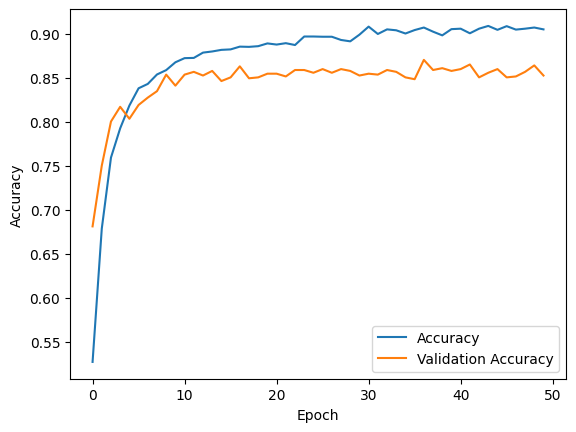

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Ottieni Predizioni

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Predizioni del modello
y_pred_probs = model.predict(X_test)

# Converti probabilità in classi previste
if y_pred_probs.shape[1] > 1:  # Multiclasse
    y_pred = y_pred_probs.argmax(axis=1)
else:  # Binario
    y_pred = (y_pred_probs > 0.5).astype(int)

# Gestisci y_test_classes
if len(y_test.shape) > 1 and y_test.shape[1] > 1:  # One-hot encoding
    y_test_classes = y_test.argmax(axis=1)
else:  # Già numerico
    y_test_classes = y_test

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


## Scores

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# X_train, X_test, y_train, y_test

# Accuracy
accuracy = accuracy_score(y_test_classes, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Classification report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)



Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       276
           1       0.85      0.81      0.83       362
           2       0.88      0.87      0.87       319

    accuracy                           0.85       957
   macro avg       0.85      0.86      0.85       957
weighted avg       0.85      0.85      0.85       957


Confusion Matrix:
[[247  23   6]
 [ 38 292  32]
 [ 12  30 277]]


## AUC e ROC

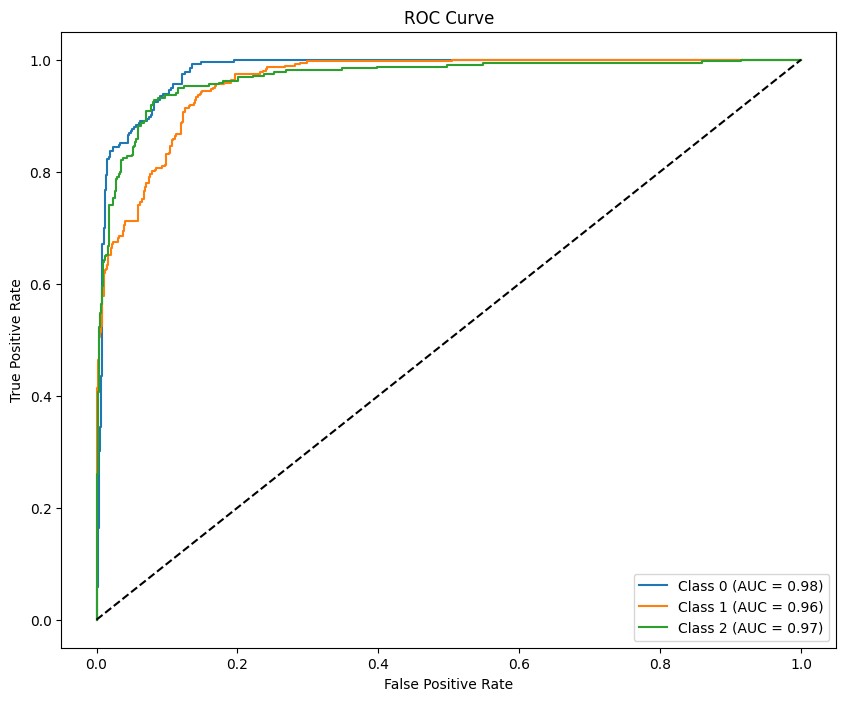

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Compute ROC Curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(np.unique(y_test_classes))):  # Number of classes
    fpr[i], tpr[i], _ = roc_curve(y_test_classes == i, y_pred_probs[:, i])
    roc_auc[i] = roc_auc_score(y_test_classes == i, y_pred_probs[:, i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(len(fpr)):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


# 10 times - 10 fold validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Numero di ripetizioni
n_repeats = 10
n_splits = 10

# Metriche cumulative
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# KFold per 10-fold validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

for repeat in range(n_repeats):
    print(f"\nRepeat {repeat + 1}/{n_repeats}")
    for train_index, test_index in kf.split(X_resampled):
        # Split dataset
        X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
        y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

        # Convert labels to one-hot encoding for training
        y_train_onehot = tf.keras.utils.to_categorical(y_train)
        y_test_onehot = tf.keras.utils.to_categorical(y_test)

        # Reinitialize and train the model for each fold
        model = Sequential([
            Dense(128, activation='relu', input_dim=X_train.shape[1]),
            Dropout(0.3),
            Dense(64, activation='relu'),
            Dropout(0.3),
            Dense(3, activation='softmax')  # Adjust number of classes
        ])
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train_onehot, epochs=50, batch_size=32, verbose=0)

        # Evaluate on the test set
        y_pred_probs = model.predict(X_test)
        y_pred = y_pred_probs.argmax(axis=1)

        # Calculate metrics for this fold
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Final evaluation
print("\nFinal Evaluation over 10-times 10-fold:")
print(f"Accuracy: {np.mean(accuracy_scores):.3f} ± {np.std(accuracy_scores):.3f}")
print(f"Precision: {np.mean(precision_scores):.3f} ± {np.std(precision_scores):.3f}")
print(f"Recall: {np.mean(recall_scores):.3f} ± {np.std(recall_scores):.3f}")
print(f"F1-Score: {np.mean(f1_scores):.3f} ± {np.std(f1_scores):.3f}")



Repeat 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Repeat 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Repeat 3/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Repeat 4/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Repeat 5/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Repeat 6/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

Repeat 7/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Repeat 8/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Repeat 9/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Repeat 10/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Final Evaluation over 10-times 10-fold:
Accuracy: 0.884 ± 0.018
Precision: 0.890 ± 0.019
Recall: 0.884 ± 0.018
F1-Score: 0.885 ± 0.018


# Variante DropOut 0.2

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Input
# Define the neural network
input_dim = X_train.shape[1]  # Number of features

model2 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.2),  # Prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')  # Adjust the output units for the number of classes
])

# Compile the model
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # For multiclass classification
    metrics=['accuracy']
)

# Train the model
history2 = model2.fit(
    X_train, tf.keras.utils.to_categorical(y_train),  # Convert labels to one-hot
    validation_data=(X_test, tf.keras.utils.to_categorical(y_test)),
    epochs=50,  # Adjust based on performance
    batch_size=32,
    verbose=1
)

# Evaluate the model
print("\nTest Evaluation:")
model2.evaluate(X_test, tf.keras.utils.to_categorical(y_test))

Epoch 1/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4633 - loss: 1.0015 - val_accuracy: 0.7008 - val_loss: 0.6975
Epoch 2/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7074 - loss: 0.6707 - val_accuracy: 0.8117 - val_loss: 0.5213
Epoch 3/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7884 - loss: 0.5086 - val_accuracy: 0.8243 - val_loss: 0.4248
Epoch 4/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8304 - loss: 0.4112 - val_accuracy: 0.8410 - val_loss: 0.3826
Epoch 5/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8454 - loss: 0.3736 - val_accuracy: 0.8724 - val_loss: 0.3560
Epoch 6/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8507 - loss: 0.3397 - val_accuracy: 0.8619 - val_loss: 0.3405
Epoch 7/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8645 - loss: 0.3162 - val_accuracy: 0.8515 - val_loss: 0.3404
Epoch 8/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8721 - loss: 0.3063 - val_accuracy: 0.

[0.30669084191322327, 0.8807531595230103]

## Modello 2: Overfitting!

# Modello 3: Test Vari

- DroupOut 0.4 dà 0.83 di accuracy e .46 di loss.
- Test con batch_size di 16 : accuracy: 0.8568 - loss: 0.4762
- Test con batch_size di 64 : accuracy: 0.8247 - loss: 0.4987

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Input
# Define the neural network
input_dim = X_train.shape[1]  # Number of features

model3 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),  # Prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # Adjust the output units for the number of classes
])

# Compile the model
model3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # For multiclass classification
    metrics=['accuracy']
)

# Train the model
history3 = model3.fit(
    X_train, tf.keras.utils.to_categorical(y_train),  # Convert labels to one-hot
    validation_data=(X_test, tf.keras.utils.to_categorical(y_test)),
    epochs=50,  # Adjust based on performance
    batch_size=32,
    verbose=1
)

# Evaluate the model
print("\nTest Evaluation:")
model3.evaluate(X_test, tf.keras.utils.to_categorical(y_test))

Epoch 1/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4060 - loss: 1.0621 - val_accuracy: 0.5481 - val_loss: 0.8407
Epoch 2/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5785 - loss: 0.8626 - val_accuracy: 0.6967 - val_loss: 0.6668
Epoch 3/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6973 - loss: 0.6800 - val_accuracy: 0.7950 - val_loss: 0.5120
Epoch 4/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7608 - loss: 0.5538 - val_accuracy: 0.8117 - val_loss: 0.4319
Epoch 5/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7870 - loss: 0.5007 - val_accuracy: 0.8452 - val_loss: 0.3862
Epoch 6/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8051 - loss: 0.4575 - val_accuracy: 0.8431 - val_loss: 0.3762
Epoch 7/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8109 - loss: 0.4263 - val_accuracy: 0.8431 - val_loss: 0.3644
Epoch 8/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8264 - loss: 0.3820 - val_accuracy: 0.

[0.31060856580734253, 0.8974895477294922]

## 2 - Times 10 fold Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Numero di ripetizioni
n_repeats = 2
n_splits = 10

# Metriche cumulative
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# KFold per 10-fold validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

for repeat in range(n_repeats):
    print(f"\nRepeat {repeat + 1}/{n_repeats}")
    for train_index, test_index in kf.split(X_resampled):
        # Split dataset
        X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
        y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

        # Convert labels to one-hot encoding for training
        y_train_onehot = tf.keras.utils.to_categorical(y_train)
        y_test_onehot = tf.keras.utils.to_categorical(y_test)

        # Reinitialize and train the model for each fold
        model3 = Sequential([
            Input(shape=(X_train.shape[1],)),
            Dense(64, activation='relu'),
            Dropout(0.3),
            Dense(128, activation='relu'),
            Dropout(0.3),  # Prevent overfitting
            Dense(64, activation='relu'),
            Dropout(0.3),
            Dense(3, activation='softmax')
        ])
        model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model3.fit(X_train, y_train_onehot, epochs=50, batch_size=32, verbose=0)

        # Evaluate on the test set
        y_pred_probs = model.predict(X_test)
        y_pred = y_pred_probs.argmax(axis=1)

        # Calculate metrics for this fold
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Final evaluation
print("\nFinal Evaluation over 2-times 10-fold:")
print(f"Accuracy: {np.mean(accuracy_scores):.3f} ± {np.std(accuracy_scores):.3f}")
print(f"Precision: {np.mean(precision_scores):.3f} ± {np.std(precision_scores):.3f}")
print(f"Recall: {np.mean(recall_scores):.3f} ± {np.std(recall_scores):.3f}")
print(f"F1-Score: {np.mean(f1_scores):.3f} ± {np.std(f1_scores):.3f}")



Repeat 1/2
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Repeat 2/2
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

Final Evaluation over 10-times 10-fold:
Accuracy: 0.914 ± 0.020
Precision: 0.918 ± 0.019
Recall: 0.914 ± 0.020
F1-Score: 0.915 ± 0.020


# Salva Modello

Monta Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Salva

In [ ]:

# Salva il modello in formato HDF5
model.save('/content/drive/MyDrive/FIA/model_4layer.h5')

# Salva il modello in formato TensorFlow SavedModel
model.save('/content/drive/MyDrive/FIA/tensorflow_model_4layer.keras')


Verifica

In [ ]:
!ls "/content/drive/MyDrive/FIA"


model3.h5  model_4layer.h5  tensorflow_model3.keras  tensorflow_model_4layer.keras


# Altro

In [ ]:
import sys
import pandas as pd
import tensorflow as tf
import keras
import requests
import matplotlib
import imblearn

print("Python version:", sys.version)
print("Pandas version:", pd.__version__)
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("Requests version:", requests.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Imblearn version:", imblearn.__version__)

Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Pandas version: 2.2.2
TensorFlow version: 2.17.1
Keras version: 3.5.0
Requests version: 2.32.3
Matplotlib version: 3.8.0
Imblearn version: 0.12.4
